# AutoArima Code in Python

In this notebook we are going to apply arima models on energy production data and try to predict future needs. Data can be downloaded from this website https://fred.stlouisfed.org/series/IPG2211A2N We start by importing needed libraries and reading data. Be sure that you have specified correct path.

In [2]:
%matplotlib inline
import pandas as pd
data = pd.read_csv("Electric_Production.csv",index_col=0)

In [31]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


We are going to rename column name to something more intuitive from IPG2211A2N to Energy Production

In [32]:
data.columns = ['Energy Production']

We are going to check what time range is present in the data and we can do that on the following way since date column is index column of the data frame. How would you inspect begin and end date without that information?

In [25]:
print('Begin date: '+ data.index[0] +'\n'+'End date: '+ data.index[-1])

Begin date: 1985-01-01
End date: 2018-09-01


We can check whole index set, and notice that index should be converted to datetime index since we are going to deal with time series.

In [27]:
data.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01'],
      dtype='object', name='DATE', length=405)

In [28]:
data.index = pd.to_datetime(data.index)

When we check our index once again it will be datetime type

In [30]:
data.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='DATE', length=405, freq=None)

Also, it's important to check do we have null values present in the dataset, since null values are problem that has to be solved with some of the methods. 

In [33]:
data[pd.isnull(data['Energy Production'])]

,Energy Production
DATE,


Now we are going to analyze time series and its main components if they exist - Trend and Seasonal part. Be aware of the fact that seasonal_decompose method is naive decomposition and more sophisticated methods should be preferred. It can provide us feeling about our time series, but mustn't be the main tool for analysis. There exist much better method and I advise to look at stl_decompose. More about it on the following link: https://pypi.org/project/stldecompose/ 

It's important to say that we can choose between additive and multiplicative model. Additive model is used when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time. A multiplicative model is used when we are increasing (or decreasing) at a non-linear rate. In our dataset, there is hard to distinguish, but it looks like the trend in earlier days is slightly increasing at a higher rate than just linear.

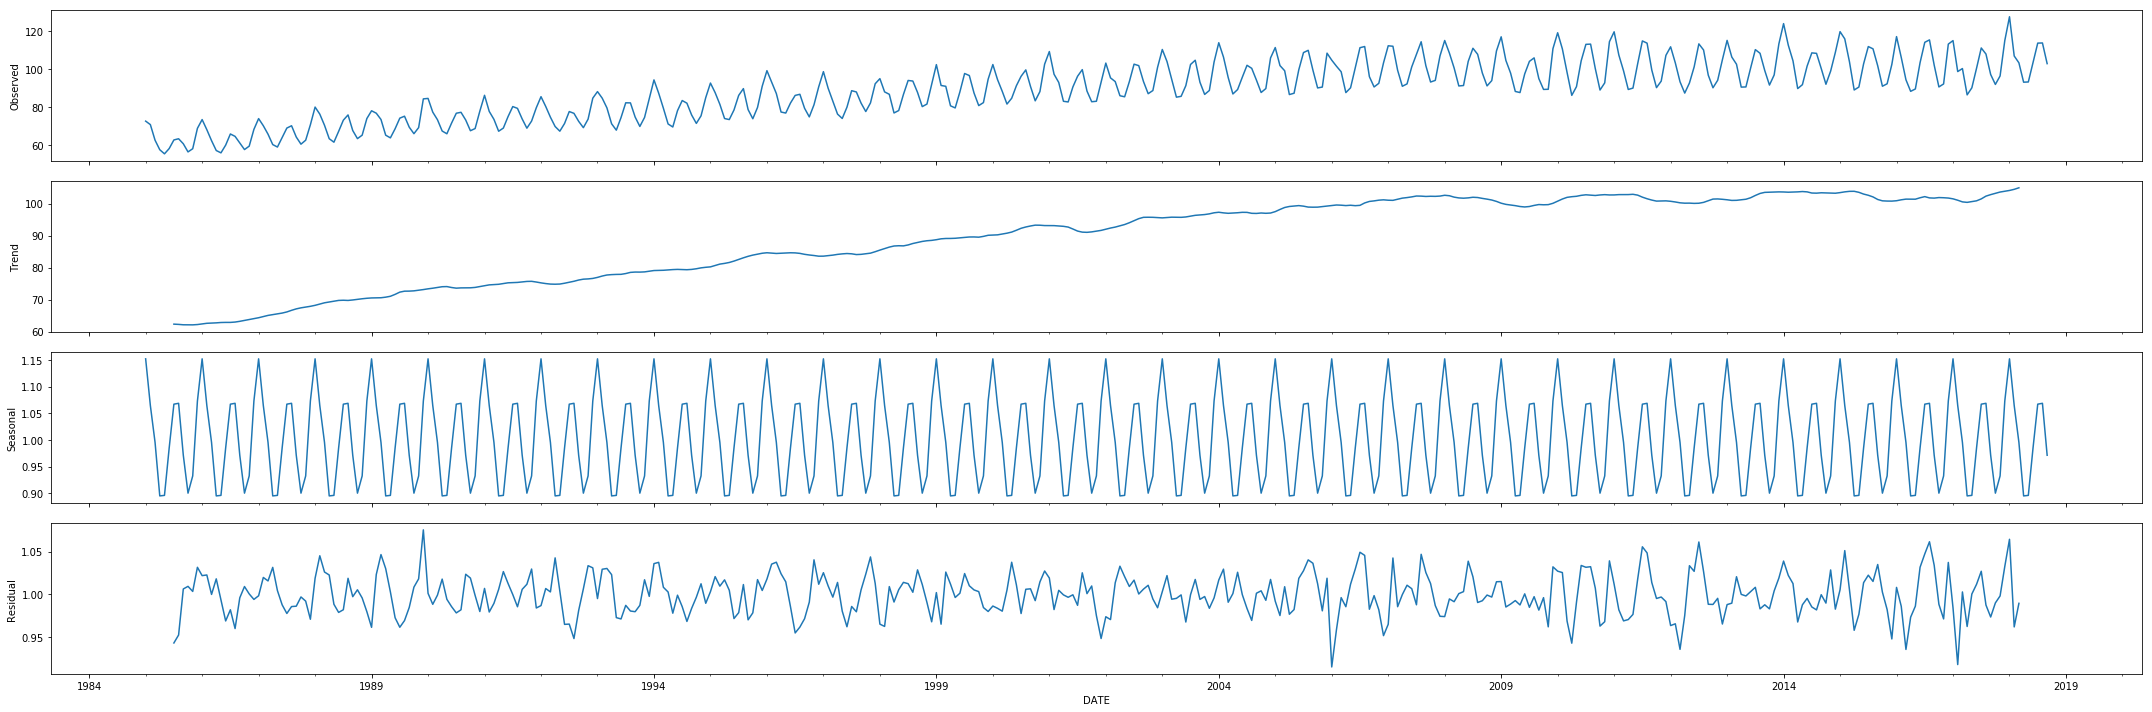

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()


**ARIMA** model stands for AutoRegressive Integrated Moving Average. There are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

**p** is the parameter associated with the auto-regressive aspect of the model, which incorporates past values. 
**d** is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series. 
**q** is the parameter associated with the moving average part of the model.

If our model has a seasonal component we use a seasonal ARIMA model **(SARIMA)**. In that case we have another set of parameters: **P**,**D**, and **Q** which describe the same associations as p,d, and q, but correspond with the seasonal components of the model.

Sometimes it's hard to decide which parameters and which value have to be included in the model, specially if you are not experienced in the field enough. In that case, auto arima is very handy and can save you a lot of trouble. It will perform grid search over different ARIMA models, and choose the best set of parameters that will provide the model with the lowest AIC between them. But be aware that applying ARIMA will not perform well if you only use it by itself and don’t account for outside factors. 

Now we are going to divide data on train and test sets:

In [34]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

Applying autoarima is very easy, just few lines of code. First it has to be imported and than range of parameters have to be set. You can read more about it here: https://www.alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html#pmdarima.arima.auto_arima in old versions pmdarima has a name as pyramid.arima

In [36]:
from pmdarima import auto_arima


stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1694.776, BIC=1714.357, Fit time=3.216 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1903.988, BIC=1911.821, Fit time=0.037 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1845.096, BIC=1860.761, Fit time=0.534 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1752.195, BIC=1767.860, Fit time=0.406 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1695.399, BIC=1718.896, Fit time=2.489 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1820.701, BIC=1836.366, Fit time=0.707 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1694.519, BIC=1718.016, Fit time=5.415 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1751.725, BIC=1771.306, Fit time=1.672 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1694.642, BIC=1722.056, Fit time=7.543 seconds
Fit ARIMA: order=(1, 1, 0) s

In [9]:
stepwise_model

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

We can see that best ARIMA model for this dataset is:

In [37]:
print(str('ARIMA')+str(stepwise_model.order)+str(stepwise_model.seasonal_order))

ARIMA(1, 1, 2)(2, 1, 1, 12)


Now we are going to fit our model on train data and try to predict on unseen data. Finally, we will compare it with test data to see how good or bad we predicted it.

In [38]:
stepwise_model.fit(train)
future_forecast = stepwise_model.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

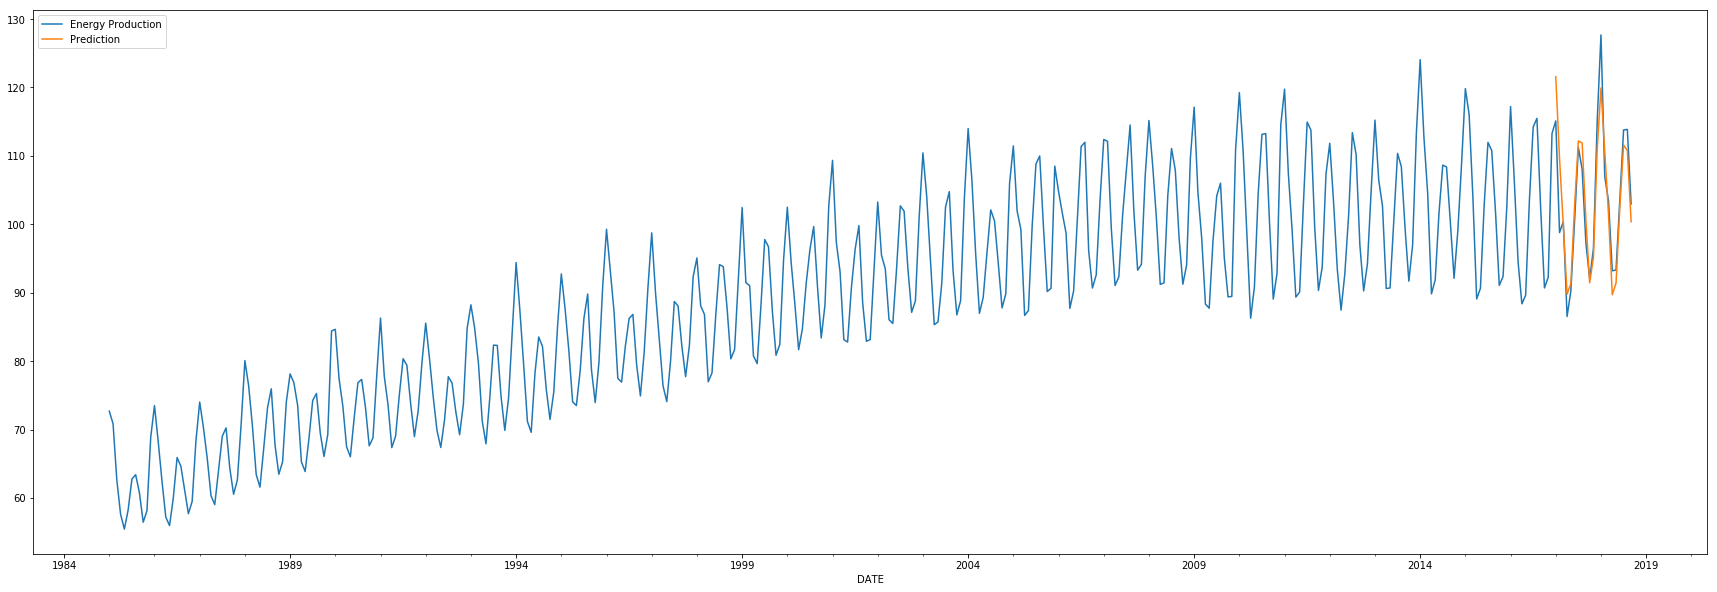

In [42]:
pd.concat([data,future_forecast],axis=1).plot()

In this tutorial we applied arima and examined main components of time serie data. Please let us know your thoughts and questions!